<a href="https://colab.research.google.com/github/AlirezaAbedinii/ImageCaptioning/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import zipfile


In [2]:
from collections import defaultdict
import json
import time
import itertools
import os, os.path

In [8]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import random
from shutil import copyfile


# Globals

## Variables

In [77]:
dataDir='/content/drive/MyDrive/Dataset/annotations_trainval2017.zip (Unzipped Files)'
dataType='val2017'
pictures_dir_path = "/content/drive/MyDrive/Dataset/val2017.zip (Unzipped Files)/val2017"
train_dir_path = "/content/drive/MyDrive/Dataset/Train"
test_dir_path = "/content/drive/MyDrive/Dataset/Test"
global_images_ids = []
global_data = []
global_test_data = []
global_train_data = []


In [78]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


## Classes

In [79]:
class Data:
  def __init__(self, id, captions):
    self.id = id
    self.captions = captions
  
  def show_info(self):
    show_img_by_file(pictures_dir_path + "/" + img_id_to_url(self.id))
    print(self.captions)
    

## Methods

In [80]:
def show_img_by_file(file_address):
  plt.imshow(mpimg.imread(file_address))
  plt.axis('off')
  plt.show()

def img_id_to_url(img_id, img_type='jpg'):
  str_id = str(img_id)

  return str_id.zfill(12) + '.' + img_type


# Dataset

## Train/Test Split

In [9]:
def split_data(source_dir, train_dir, test_dir, split_size):

  ### START CODE HERE
  
  # Selecitng non-zero-size-files files
  items = os.listdir(source_dir)

  # Shuffle the list
  items = random.sample(items, len(items))

  # Copying
  for i in range(len(items)):
    if i < split_size * len(items):
      copyfile(os.path.join(source_dir, items[i]), os.path.join(train_dir, items[i]))
    else:
      copyfile(os.path.join(source_dir, items[i]), os.path.join(test_dir, items[i]))

In [12]:
split_data(pictures_dir_path, train_dir_path, test_dir_path, 0.8)
print(len(os.listdir(train_dir_path)), len(os.listdir(test_dir_path)))

4000 1000


## Load Images and Captions

In [81]:
def img_url_to_id(img_url, img_type='jpg'):
  return int(img_url[:-len(img_type)-1])

def load_img_captions(img_id):
  captions = []
  annIds = coco_caps.getAnnIds(imgIds=img_id);
  anns = coco_caps.loadAnns(annIds)
  for ann in anns:
    captions.append(ann['caption'])
  return captions

def load_imgs_and_caps(source_dir, is_training):
  global global_data, global_train_data, get_test_data
  images = os.listdir(source_dir)
  for img_url in images:
    img_id = img_url_to_id(img_url)
    captions = load_img_captions(img_id)
    data = Data(id = img_id, captions = captions)
    global_data.append(data) 
    if is_training:
      global_train_data.append(data)
    else:
      global_test_data.append(data)

In [82]:
load_imgs_and_caps(train_dir_path, True)
print(len(global_train_data), len(global_test_data), len(global_data))
load_imgs_and_caps(test_dir_path, False)
print(len(global_train_data), len(global_test_data), len(global_data))

4000 0 4000
4000 1000 5000


# Test

## Captions

In [51]:
dataDir='/content/drive/MyDrive/Dataset/annotations_trainval2017.zip (Unzipped Files)'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [52]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


## Show test

In [60]:
DIR = '/content/drive/MyDrive/Dataset/val2017.zip (Unzipped Files)/val2017'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

5000


{'license': 2, 'file_name': '000000000139.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000000139.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-21 01:34:01', 'flickr_url': 'http://farm9.staticflickr.com/8035/8024364858_9c41dc1666_z.jpg', 'id': 139}
A woman stands in the dining area at the table. {'image_id': 139, 'id': 376968, 'caption': 'A room with chairs, a table, and a woman in it.'}
A woman stands in the dining area at the table.
A room with chairs, a table, and a woman in it.
A woman standing in a kitchen by a window
A person standing at a table in a room.
A living area with a television and a table


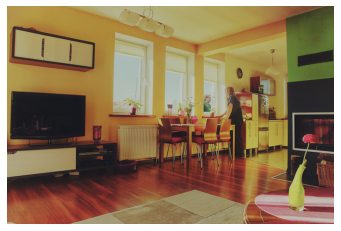

In [44]:
img = coco_caps.loadImgs(ids = [139])[0]

print(img)

annIds = coco_caps.getAnnIds(imgIds=139);
anns = coco_caps.loadAnns(annIds)
print(anns[0]['caption'], anns[1])
coco_caps.showAnns(anns)
plt.imshow(mpimg.imread("/content/drive/MyDrive/Dataset/val2017.zip (Unzipped Files)/val2017/000000000139.jpg"))
# plt.imshow(io.imread(img['coco_url']))
plt.axis('off')
plt.show()